In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col]=encoder.fit_transform(df[col])
print(df)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     0
1     47    1   1            0   13.093     3
2     47    1   1            0   10.114     3
3     28    0   2            0    7.798     4
4     61    0   1            0   18.043     0
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     3
196   16    1   1            0   12.006     3
197   52    1   2            0    9.894     4
198   23    1   2            1   14.020     4
199   40    0   1            1   11.349     4

[200 rows x 6 columns]


In [ ]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [ ]:
X=np.array(X)
y=np.array(y).reshape(-1,1)

In [ ]:
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

In [ ]:
y

array([['DrugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['DrugY'],
       ['drugX'],
       ['DrugY'],
       ['drugC'],
       ['DrugY'],
       ['DrugY'],
       ['drugC'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['drugX'],
       ['DrugY'],
       ['drugX'],
       ['drugA'],
       ['drugC'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['drugX'],
       ['DrugY'],
       ['DrugY'],
       ['drugX'],
       ['drugB'],
       ['drugX'],
       ['DrugY'],
       ['drugX'],
       ['drugX'],
       ['drugA'],
       ['drugX'],
       ['drugX'],
       ['drugX'],
       ['DrugY'],
       ['drugB'],
       ['DrugY'],
       ['drugX'],
       ['drugX'],
       ['drugX'],
       ['drugA'],
       ['drugC'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['drugX'],
       ['DrugY'],
       ['DrugY'],
       ['drugB'],
       ['d

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
  )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': list(range(1, 10))}

In [ ]:
# Re-run GridSearchCV with the correctly prepared data
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': list(range(1, 10))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())

print(f"Best K value: {grid_search.best_params_['n_neighbors']}")
print(f"Best CV score: {grid_search.best_score_}")

Best K value: 7
Best CV score: 0.71875


In [ ]:
from sklearn.metrics import accuracy_score

# Get the best estimator from grid_search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.6500


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:",r2)

MSE: 1.775
RMSE: 1.3322912594474228
R2: 0.3715423766319983


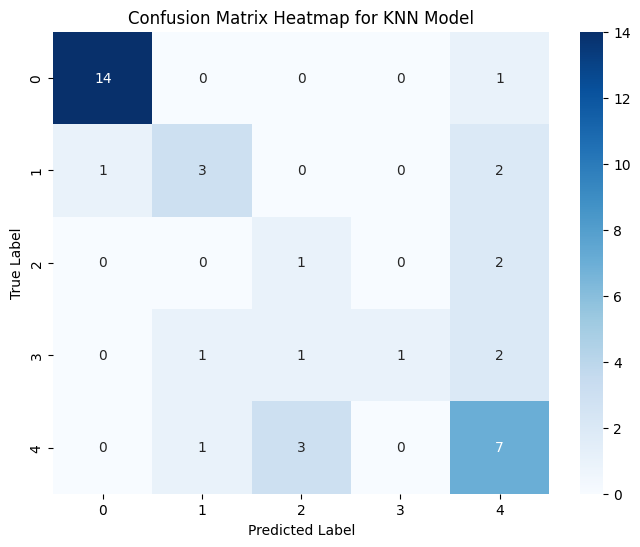

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap for KNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

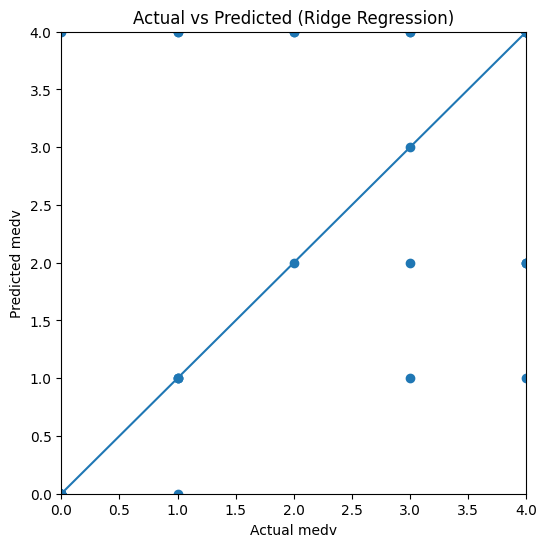

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], )
plt.xlim([0, max_val])
plt.ylim([0, max_val])
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.show()